Data science final project
Group: Pramit Kaucha Magar(47)
       Kumud Dhungana(34)
       Bishow Jung Thapa(25)

In [137]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

loading dataset

In [92]:
df = pd.read_csv("X_test.csv")

In [93]:
df.head()

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,2308.0,Peter Neeves,M,1.0,30.0,89.81,179.17,192.78
1,22404.0,Josh Padilla,M,0.0,27.0,74.95,125.00,165.00
2,23397.0,Luke Dreier,M,1.0,30.0,122.61,290.00,317.50
3,25058.0,Jacob New,M,0.0,20.0,88.00,187.50,240.00
4,2664.0,Jesse Burdick,M,1.0,30.0,122.00,235.01,275.01


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerId        11100 non-null  float64
 1   Name            11100 non-null  object 
 2   Sex             11100 non-null  object 
 3   Equipment       11100 non-null  float64
 4   Age             10855 non-null  float64
 5   BodyweightKg    11100 non-null  float64
 6   BestSquatKg     11100 non-null  float64
 7   BestDeadliftKg  11100 non-null  float64
dtypes: float64(6), object(2)
memory usage: 693.9+ KB


In [95]:
df.describe()

,playerId,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
count,11100.000000,11100.000000,10855.000000,11100.000000,11100.000000,11100.000000
mean,14931.392523,0.209279,29.703086,85.245934,179.352391,201.099868
std,8636.003197,0.406812,11.609336,22.749439,69.410025,62.709112
min,3.000000,0.000000,8.500000,24.100000,20.000000,25.000000
25%,7551.750000,0.000000,21.500000,68.522500,124.730000,147.500000
50%,14823.500000,0.000000,26.500000,82.100000,175.000000,204.120000
75%,22404.250000,0.000000,35.000000,98.700000,222.500000,247.500000
max,29999.000000,1.000000,89.500000,242.400000,532.970000,420.500000


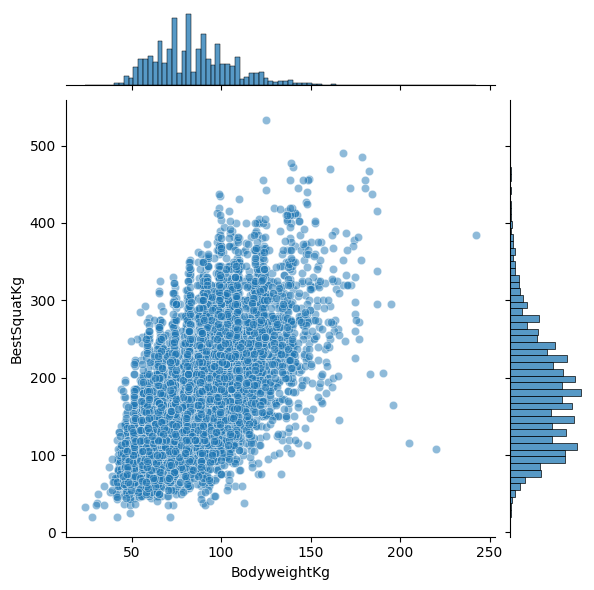

In [96]:
sns.jointplot(x="BodyweightKg" , y="BestSquatKg",data = df, alpha = 0.5)

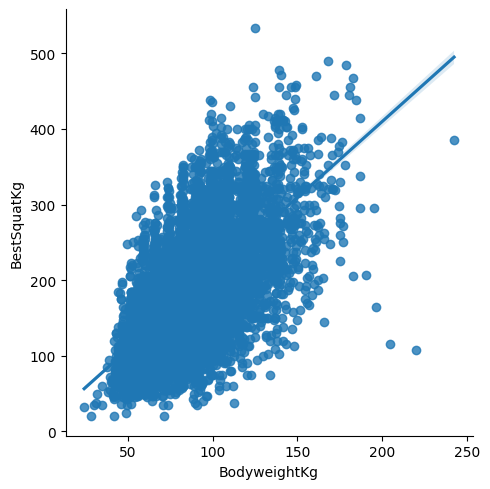

In [14]:
sns.lmplot(x="BodyweightKg" , y="BestSquatKg",data = df, scatter={'alpha:0.3'})

In [17]:
from sklearn.model_selection import train_test_split

In [152]:
x = df[['Equipment','BodyweightKg']]
y = df['BestDeadliftKg']

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.9,random_state=42)

In [176]:
y_train


1990     150.0
1205     250.0
4971     307.5
10799    165.0
6783     167.5
         ...  
5734     180.0
5191     272.5
5390     127.0
860      180.0
7270     230.0
Name: BestDeadliftKg, Length: 1110, dtype: float64

Model Training

In [33]:
from sklearn.linear_model import LinearRegression

In [177]:
lm = LinearRegression()

In [178]:
lm.fit(x_train,y_train)

LinearRegression()

In [179]:
lm.coef_

array([7.56318007, 1.60948801])

In [180]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns = ['coef'])
print(cdf)

                  coef
Equipment     7.563180
BodyweightKg  1.609488


predictions

In [181]:
prediction = lm.predict(x_test)

In [182]:
prediction

array([169.33245446, 193.84495685, 129.46543646, ..., 260.6212008 ,
       176.46248634, 133.48915648], shape=(9990,))

Text(0.5, 1.0, 'Evaluation')

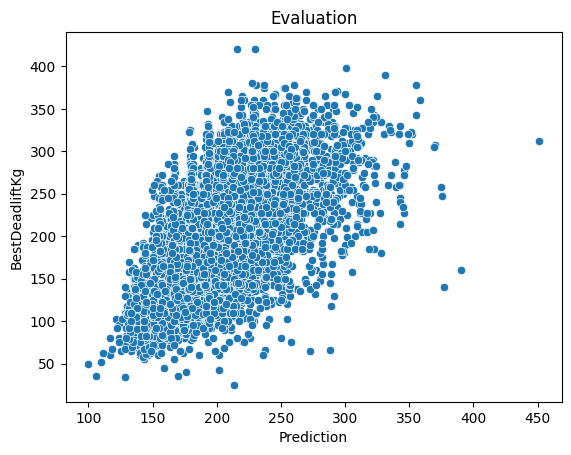

In [183]:
sns.scatterplot(x=prediction,y=y_test)
plt.xlabel("Prediction")
plt.title('Evaluation')

somewhat straight line can be observed

In [138]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

Errors

In [185]:
print('mean_absolute_error: ', mean_absolute_error(y_test,prediction))
print('mean_squared_error: ', mean_squared_error(y_test,prediction))
print("Root_Mean_squared_error:", math.sqrt(mean_squared_error(y_test,prediction)))

mean_absolute_error:  38.775210602473564
mean_squared_error:  2301.1902472049997
Root_Mean_squared_error: 47.97072281303461


In [186]:
residuals = y_test - prediction

residuals: distance/difference between actual and predicted value

In [187]:
residuals

2483    -39.332454
1498    -26.344957
5438    -24.465436
7317    -14.970528
6380     66.959787
           ...    
10599   -49.123435
6320    -27.107138
5975      9.378799
3572     48.537514
5299    -23.489156
Name: BestDeadliftKg, Length: 9990, dtype: float64

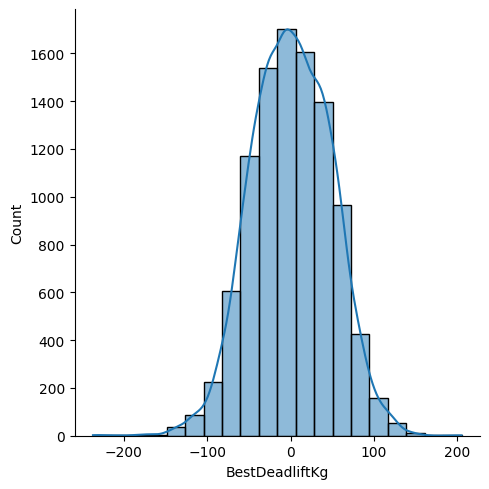

In [190]:
sns.displot(residuals, bins = 20 , kde = True)

Normal distribution can be seen

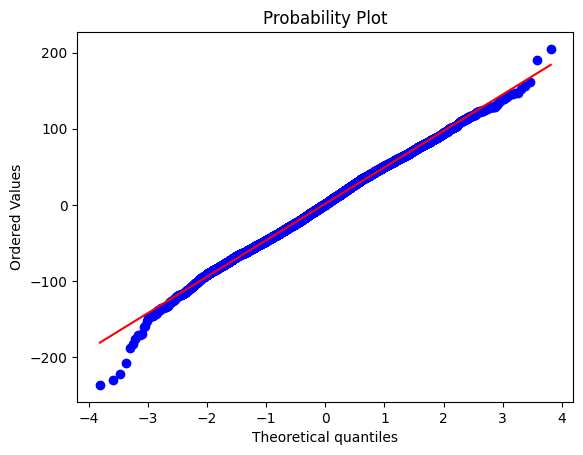

In [191]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()